In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

In [0]:
from scipy.stats import uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [0]:
data = pd.read_csv('breast-cancer-wisconsin.csv',header=None)

#set column names
data.columns = ['Sample Code Number','Clump Thickness','Uniformity of Cell Size',
                'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

data.head()

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
df.shape

(698, 11)

In [0]:
#Data cleaning
data = data.drop(['Sample Code Number'],axis=1) #Drop 1st column
data = data[data['Bare Nuclei'] != '?'] #Remove rows with missing data
data['Class'] = np.where(data['Class'] == 2,0,1) #Change the Class representation
data.head() #View top 10 rows

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [0]:
#Split data into attributes and class
X = data.drop(['Class'],axis=1)
y = data['Class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = clf.predict(X_test)

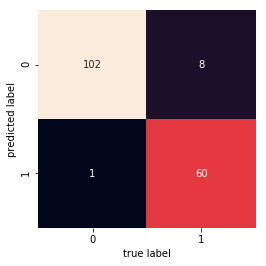

In [0]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
accuracy_score(y_test, y_pred)

0.9473684210526315

In [0]:
recall_score(y_test, y_pred)

0.8823529411764706

In [0]:
precision_score(y_test, y_pred)

0.9836065573770492

In [0]:
values = {'penalty': ['l1', 'l2'], 'C': uniform(loc=0, scale=4)}

In [0]:
clf = LogisticRegression()
random_clf = RandomizedSearchCV(clf, param_distributions=values, scoring='recall')

In [0]:
random_clf.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff5c5b65d30>,
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
         

In [0]:
random_clf.get_params()

{'cv': 'warn',
 'error_score': 'raise-deprecating',
 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'warn',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'warn',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'iid': 'warn',
 'n_iter': 10,
 'n_jobs': None,
 'param_distributions': {'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x7ff5c5b65d30>,
  'pen

In [0]:
values = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.09, 0.01, .09, 1, 5, 10, 25]}

In [0]:
clf = LogisticRegression()
grid_clf = GridSearchCV(clf, param_grid=values, scoring='recall')

In [0]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.09, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [0]:
grid_clf.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [0]:
y_pred_grid = grid_clf.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred_grid)

0.9298245614035088

In [0]:
recall_score(y_test, y_pred_grid)

0.8970588235294118

In [0]:
precision_score(y_test, y_pred_grid)

0.9242424242424242

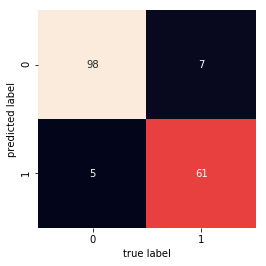

In [0]:
mat = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
clf = LogisticRegression()
grid_clf = GridSearchCV(clf, param_grid=values, scoring='recall')
kf = KFold(n_splits=5, shuffle=True)

In [0]:
scores, predictions, params = [], [], []
for i in range(5):
    result = next(kf.split(X_train), None)
    X1_train = X_train.iloc[result[0]]
    X1_test = X_train.iloc[result[1]]
    y1_train = y_train.iloc[result[0]]
    y1_test = y_train.iloc[result[1]]
    model = grid_clf.fit(X1_train, y1_train)
    predictions.append(grid_clf.predict(X1_test))
    params.append(model.best_params_)
    scores.append(model.score(X1_test,y1_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [0.9655172413793104, 0.9655172413793104, 0.972972972972973, 0.9230769230769231, 0.9285714285714286]
Average K-Fold Score : 0.9511311614759892


In [0]:
pprint(params)

[{'C': 0.01, 'penalty': 'l1'},
 {'C': 0.001, 'penalty': 'l2'},
 {'C': 0.01, 'penalty': 'l1'},
 {'C': 0.01, 'penalty': 'l1'},
 {'C': 0.01, 'penalty': 'l1'}]


In [0]:
clf = LogisticRegression()
grid_clf = GridSearchCV(clf, param_grid=values, scoring='recall')
ovr = OneVsRestClassifier(grid_clf).fit(X_train, y_train)

In [0]:
ovr.get_params()

{'estimator': GridSearchCV(cv='warn', error_score='raise-deprecating',
              estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                           fit_intercept=True,
                                           intercept_scaling=1, l1_ratio=None,
                                           max_iter=100, multi_class='warn',
                                           n_jobs=None, penalty='l2',
                                           random_state=None, solver='warn',
                                           tol=0.0001, verbose=0,
                                           warm_start=False),
              iid='warn', n_jobs=None,
              param_grid={'C': [0.001, 0.09, 0.01, 0.09, 1, 5, 10, 25],
                          'penalty': ['l1', 'l2']},
              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
              scoring='recall', verbose=0),
 'estimator__cv': 'warn',
 'estimator__error_score': 'raise-deprecatin

In [0]:
ovr.score(X_test, y_test)

0.9298245614035088

In [0]:
clf = LogisticRegression()
grid_clf = GridSearchCV(clf, param_grid=values, scoring='recall', cv=5)
grid_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.09, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [0]:
grid_clf.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [0]:
clf = LogisticRegression()
random_clf = RandomizedSearchCV(clf, param_distributions=values, scoring='recall', cv=5)
random_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.09, 0.01, 0.09, 1, 5, 10,
                                              25],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,

In [0]:
random_clf.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'warn',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'warn',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'iid': 'warn',
 'n_iter': 10,
 'n_jobs': None,
 'param_distributions': {'C': [0.001, 0.09, 0.01, 0.09, 1, 5, 10, 25],
  'penalty': ['l1', 'l2']},
 'pre_d